<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [1]:
### YOUR CODE STARTS HERE
import pandas as pd
from scipy.stats import ttest_ind
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', na_values="?", header=None)
df.columns=['party','handicapped-infants','water-project-cost-sharing',
            'adoption-of-the-budget-resolution','physician-fee-freeze',
            'el-salvador-aid', 'religious-groups-in-schools',
            'anti-satellite-test-ban','aid-to-nicaraguan-contras',
            'mx-missile','immigration','synfuels-corporation-cutback',
            'education-spending','superfund-right-to-sue','crime',
            'duty-free-exports','export-administration-act-south-africa']
df=df.replace('y',1)
df=df.replace('n',0)
df.head()
#df.isna().sum()


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def column_test(df,column):
  df_1=df[['party',column]]
  df_1=df_1.dropna()
  
  dem = df_1[df_1['party']=='democrat']
  rep = df_1[df_1['party']=='republican']
  result=ttest_ind(dem[column], rep[column], equal_var=False)
  return result

Null Hypothesis: Democrats and Republicans support education spending equally.

Alternative Hypothesis: Democrats support education spending more than Republicans.

Confidence Level = .99

In [3]:
column_test(df,'education-spending')

#democrats support education spending more than republicans with p-value<0.01


Ttest_indResult(statistic=-20.724815686746847, pvalue=3.5687507663396274e-62)

We reject the null hypothesis. Democrats support education spending more than republicans with p-value<0.01.

Null Hypothesis: Democrats and Republicans support aid to Nicaraguan Contras equally.

Alternative Hypothesis: Republicans support aid to Nicaraguan Contras more than Democrats.

Confidence Level = .99

In [0]:
column_test(df,'aid-to-nicaraguan-contras')
#republicans support aid to nicaraguan contras more than democrats with p-value<0.01

Ttest_indResult(statistic=18.254856278479284, pvalue=2.2881206640098e-52)

We reject the null hypothesis. Republicans support aid to Nicaraguan Contras spending more than Democrats with p-value<0.01.

Null Hypothesis: Democrats and Republicans support water project cost sharing equally.

Alternative Hypothesis: Republicans support water project cost sharing more than Democrats.

Confidence Level = .99

In [0]:
column_test(df,'water-project-cost-sharing')
#There does not seem to be a party difference on water project cost sharing

Ttest_indResult(statistic=-0.08893998898558053, pvalue=0.9291867875224519)

We fail to reject the null hypothesis. 


In [0]:
from scipy.stats import ttest_1samp
def column_test_if_even(df,column):
  df_1=df[['party',column]]
  df_1=df_1.dropna()
  result=ttest_1samp(df_1[column],0.5,nan_policy='omit')
  return result
column_test_if_even(df,'handicapped-infants')

Ttest_1sampResult(statistic=-2.3957721114055923, pvalue=0.01702012396699793)

In [5]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'Republicans and Democrats appear to differ on most issues')

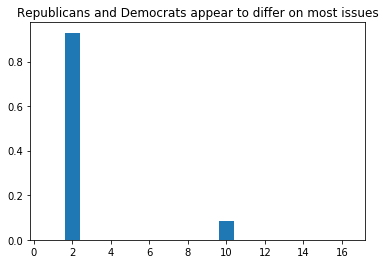

In [11]:
list_of_results=[]
for column in df.columns:
  if column!="party":
    a=column_test(df,column)
    list_of_results.append(a.pvalue)
import matplotlib.pyplot as plt
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],list_of_results)
plt.title("Republicans and Democrats appear to differ on most issues")